For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

##### Experimental

In [2]:
# simulation using .rvs on distribution object

# represent data
# create matrix
n_simulations = 100_000

cars_at_noon_ex_one = stats.poisson(2).rvs(n_simulations)
cars_at_noon_ex_one

array([3, 1, 1, ..., 1, 3, 2])

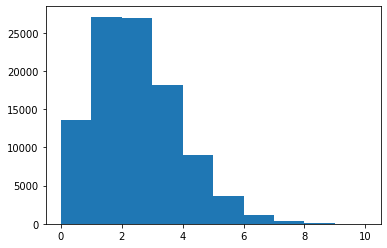

In [3]:
plt.hist(cars_at_noon_ex_one)
plt.show()

In [4]:
# What is the probability that no cars drive up in the noon hour?
(cars_at_noon_ex_one == 0).mean()

0.13547

In [5]:
# What is the probability that 3 or more cars come through the
# drive through?
(cars_at_noon_ex_one >= 3).mean()

0.32437

In [6]:
# How likely is it that the drive through gets at least 1 car?
(cars_at_noon_ex_one > 0).mean()

0.86453

In [7]:
# simulation using using numpy

# represent data
# create matrix

cars_at_noon_ex_two = np.random.poisson(2, size=(n_simulations))
cars_at_noon_ex_two

array([0, 2, 2, ..., 0, 2, 1])

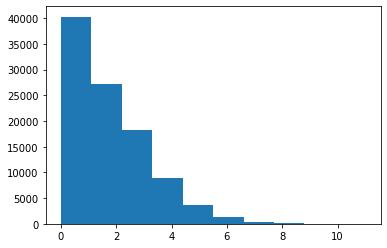

In [8]:
plt.hist(cars_at_noon_ex_two)
plt.show()

In [9]:
# What is the probability that no cars drive up in the noon hour?
(cars_at_noon_ex_two == 0).mean()

0.13362

In [10]:
# What is the probability that 3 or more cars come through the
# drive through?
(cars_at_noon_ex_two >= 3).mean()

0.32535

In [11]:
# How likely is it that the drive through gets at least 1 car?
(cars_at_noon_ex_two > 0).mean()

0.86638

###### Theoretical

In [12]:
cars_at_noon_th = stats.poisson(2)
cars_at_noon_th

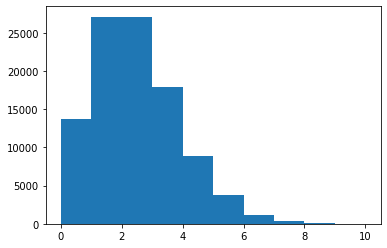

In [13]:
plt.hist(cars_at_noon_th.rvs(100_000))
plt.show()

In [14]:
# What is the probability that no cars drive up in the noon hour?
cars_at_noon_th.pmf(0)

0.1353352832366127

In [15]:
# What is the probability that 3 or more cars come through the
# drive through?
cars_at_noon_th.sf(2)

0.32332358381693654

In [16]:
# How likely is it that the drive through gets at least 1 car?
cars_at_noon_th.sf(0)

0.8646647167633873

---
2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

###### Experimental

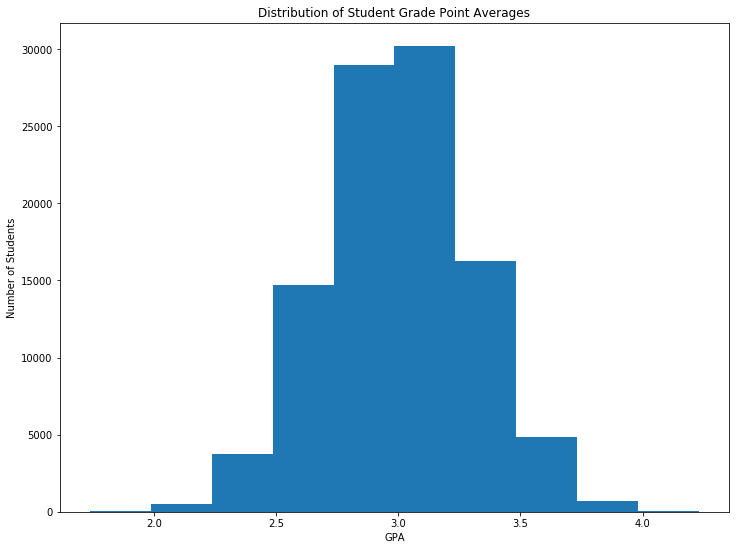

In [17]:
# simulation using using numpy
n_simulations = 100_000
n_trials = 1

# represent data
# create matrix
grades_ex = np.random.normal(3, .3, size=(n_simulations, n_trials))
plt.figure(figsize=(12,9))
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grade Point Averages")
plt.hist(grades_ex)
plt.show()

In [18]:
grades_ex

array([[3.03446724],
       [2.33794635],
       [2.95485426],
       ...,
       [3.17677436],
       [2.96331278],
       [2.62082988]])

In [19]:
# What grade point average is required to be in the top 5% of the
# graduating class?
np.percentile(grades_ex, 95)

3.4991523174843735

In [20]:
# What GPA constitutes the bottom 15% of the class?
np.percentile(grades_ex, 15)

2.6892732684014375

In [21]:
# An eccentric alumnus left scholarship money for students in the
# third decile from the bottom of their class.
# Determine the range of the third decile.
# Would a student with a 2.8 grade point average qualify for this
# scholarship?
print(np.percentile(grades_ex, 30))
print(np.percentile(grades_ex, 40))

2.8424868183104453
2.924071458814094


In [22]:
# If I have a GPA of 3.5, what percentile am I in?
(grades_ex >= 3.5).mean()

0.04976

###### Theoretical

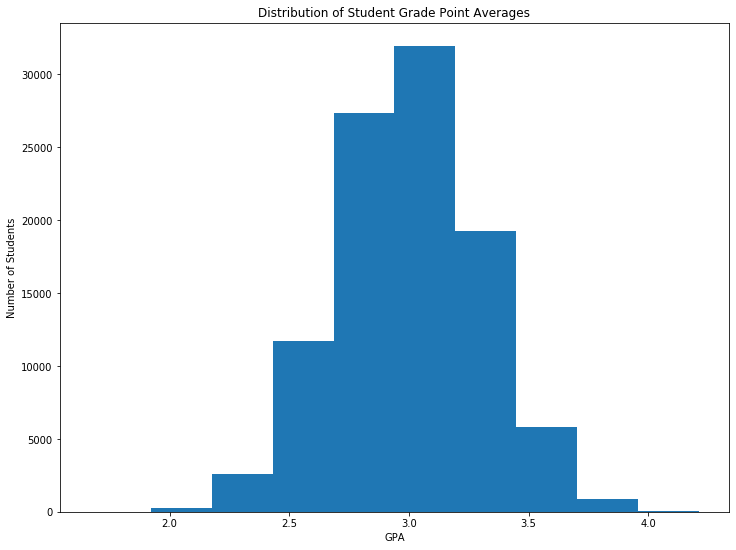

In [23]:
mean = 3
std = .3

grades_th = stats.norm(mean, std)
plt.figure(figsize=(12,9))
plt.hist(grades_th.rvs(n_simulations))
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grade Point Averages")
plt.show()

In [24]:
# What grade point average is required to be in the top 5% of the
# graduating class?
grades_th.isf(.05) # top 5%

3.4934560880854417

In [25]:
# What grade point average is required to be in the top 5% of the
# graduating class?
grades_th.ppf(.95) # 95th percentile

3.4934560880854417

In [26]:
# What GPA constitutes the bottom 15% of the class?
grades_th.isf(.85) # bottom 15%

2.689069983151863

In [27]:
# What GPA constitutes the bottom 15% of the class?
grades_th.ppf(.15) # 15th percentile

2.689069983151863

---
###### Question

In [28]:
# An eccentric alumnus left scholarship money for students in the
# third decile from the bottom of their class.
# Determine the range of the third decile.
# Would a student with a 2.8 grade point average qualify for this
# scholarship?
third_decile = 3 / 10
fourth_decile = 4 / 10
print(third_decile)
print(fourth_decile)

0.3
0.4


In [29]:
print(grades_th.ppf(third_decile))
print(grades_th.ppf(fourth_decile))

2.842679846187588
2.9239958690592602


---

In [30]:
# If I have a GPA of 3.5, what percentile am I in?
grades_th.sf(3.5) # 95th percentile

0.0477903522728147

In [31]:
# If I have a GPA of 3.5, what percentile am I in?
grades_th.cdf(3.5) # top 5%

0.9522096477271853

---
3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

###### Experimental

In [32]:
n = 4326 # number of trials
p = .02 # probability of success
n_simulations = 100_000

(np.random.binomial(n, p, size=(n_simulations)) >= 97).mean()

0.13911

###### Theoretical

In [33]:
n = 4326 # number of trials
p = .02 # probability
stats.binom(n, p).sf(96)

0.1397582363130086

---
4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

    - What is the probability that at least one of your first 60 answers is correct?

###### Experimental

In [34]:
key = pd.DataFrame(np.random.random(size=(100_000, 100)).round(2))
key

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.76,0.06,0.54,0.37,0.32,0.40,0.48,0.87,0.44,0.54,...,0.69,0.84,0.10,0.26,0.68,0.55,0.86,0.62,0.37,0.35
1,0.20,0.06,0.03,0.54,0.16,0.85,0.03,0.45,0.35,0.37,...,0.65,0.05,0.78,0.78,0.77,0.05,0.02,0.94,0.31,0.99
2,0.18,0.36,0.06,0.09,0.29,0.00,0.27,0.95,0.69,0.59,...,0.75,0.70,0.79,0.36,0.63,0.85,0.56,0.95,0.09,0.92
3,0.27,0.46,0.16,0.86,0.98,0.17,0.81,0.30,0.46,0.19,...,0.15,0.16,0.98,0.99,0.55,0.91,0.45,0.33,0.57,0.72
4,0.21,0.41,0.19,0.66,0.98,0.51,0.93,0.09,0.50,0.91,...,0.17,0.42,0.45,0.89,0.18,0.35,0.38,0.69,0.47,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.60,0.51,0.73,0.72,0.92,0.04,0.42,0.39,0.45,0.65,...,0.57,0.72,0.52,0.75,0.00,0.41,0.38,0.85,0.54,0.47
99996,0.65,0.39,0.36,0.20,0.69,0.93,0.24,0.99,0.38,0.52,...,0.38,0.51,0.51,0.07,0.22,0.36,0.71,0.90,0.08,0.86
99997,0.29,0.35,0.05,0.28,0.15,0.16,0.88,0.67,0.44,0.45,...,0.28,0.80,0.90,0.53,0.20,0.29,0.49,0.08,0.92,0.56
99998,0.36,0.40,0.90,0.55,0.24,0.69,0.19,0.23,0.71,0.36,...,0.36,0.38,0.55,0.99,0.01,0.25,0.31,0.29,0.06,0.03


In [35]:
my_answers = pd.DataFrame(np.random.random(size=(100_000, 100)).round(2))
my_answers

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.44,0.95,0.97,0.63,0.46,0.64,0.24,0.23,0.63,0.86,...,0.65,0.80,0.07,0.47,0.97,0.78,0.25,0.68,0.92,0.19
1,0.18,0.04,0.24,0.20,0.70,0.72,0.37,0.24,0.69,0.46,...,0.94,0.29,0.27,0.76,0.91,0.83,0.25,0.83,0.75,0.27
2,0.06,0.41,0.27,0.32,0.27,0.07,0.04,0.38,0.36,0.05,...,0.23,0.96,0.99,0.17,0.26,0.86,0.28,0.04,0.09,0.30
3,0.79,0.26,0.47,0.61,0.21,0.75,0.27,0.52,0.02,0.14,...,0.31,0.34,0.28,0.27,0.58,0.48,0.07,0.20,0.23,0.31
4,0.54,0.40,0.39,0.00,0.00,0.56,0.12,0.63,0.08,0.09,...,0.34,1.00,0.73,0.01,0.28,0.32,0.85,0.14,0.40,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.58,0.96,0.78,0.87,0.68,0.50,0.35,0.20,0.06,0.76,...,0.97,0.20,0.39,0.00,0.96,0.10,0.00,0.20,0.06,0.54
99996,0.22,0.30,0.45,0.30,0.85,0.39,0.86,0.32,0.53,0.31,...,0.23,0.33,0.17,0.52,0.45,0.91,0.02,0.68,0.84,0.13
99997,0.79,0.41,0.02,0.62,0.95,0.69,0.88,0.95,0.43,0.54,...,0.83,0.49,0.66,0.03,0.87,0.08,0.78,0.93,0.07,0.50
99998,0.49,0.76,0.47,0.31,0.73,1.00,0.06,0.81,0.57,0.54,...,0.91,0.25,0.56,0.60,0.57,0.44,0.48,0.19,0.84,0.90


In [36]:
# get first 60 columns
my_answers.loc[:,:59]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.44,0.95,0.97,0.63,0.46,0.64,0.24,0.23,0.63,0.86,...,0.83,0.30,0.69,0.59,0.60,0.72,0.79,0.79,0.99,0.76
1,0.18,0.04,0.24,0.20,0.70,0.72,0.37,0.24,0.69,0.46,...,0.99,0.99,0.17,0.49,0.80,0.11,0.65,0.80,0.33,0.22
2,0.06,0.41,0.27,0.32,0.27,0.07,0.04,0.38,0.36,0.05,...,0.84,0.45,0.72,0.77,0.75,0.20,0.30,0.69,0.81,0.01
3,0.79,0.26,0.47,0.61,0.21,0.75,0.27,0.52,0.02,0.14,...,0.00,0.10,0.76,0.45,0.34,0.03,0.59,0.80,0.35,0.52
4,0.54,0.40,0.39,0.00,0.00,0.56,0.12,0.63,0.08,0.09,...,0.43,0.74,0.07,0.63,0.54,0.97,0.87,0.19,0.45,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.58,0.96,0.78,0.87,0.68,0.50,0.35,0.20,0.06,0.76,...,0.83,0.31,0.02,0.74,0.91,0.62,0.43,0.07,0.17,0.88
99996,0.22,0.30,0.45,0.30,0.85,0.39,0.86,0.32,0.53,0.31,...,0.47,0.46,0.11,0.29,0.22,0.30,0.71,0.32,0.54,0.39
99997,0.79,0.41,0.02,0.62,0.95,0.69,0.88,0.95,0.43,0.54,...,0.36,0.14,0.07,0.54,0.71,0.83,0.36,0.13,0.06,0.33
99998,0.49,0.76,0.47,0.31,0.73,1.00,0.06,0.81,0.57,0.54,...,0.70,0.77,0.72,0.68,0.38,0.93,0.24,0.65,0.34,0.64


In [37]:
# aggregate by row
my_answers["correct_answers_first_sixty"] = (my_answers.loc[:,:59] == key.loc[:,:59]).sum(axis=1)
my_answers

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,correct_answers_first_sixty
0,0.44,0.95,0.97,0.63,0.46,0.64,0.24,0.23,0.63,0.86,...,0.80,0.07,0.47,0.97,0.78,0.25,0.68,0.92,0.19,0
1,0.18,0.04,0.24,0.20,0.70,0.72,0.37,0.24,0.69,0.46,...,0.29,0.27,0.76,0.91,0.83,0.25,0.83,0.75,0.27,1
2,0.06,0.41,0.27,0.32,0.27,0.07,0.04,0.38,0.36,0.05,...,0.96,0.99,0.17,0.26,0.86,0.28,0.04,0.09,0.30,0
3,0.79,0.26,0.47,0.61,0.21,0.75,0.27,0.52,0.02,0.14,...,0.34,0.28,0.27,0.58,0.48,0.07,0.20,0.23,0.31,0
4,0.54,0.40,0.39,0.00,0.00,0.56,0.12,0.63,0.08,0.09,...,1.00,0.73,0.01,0.28,0.32,0.85,0.14,0.40,0.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.58,0.96,0.78,0.87,0.68,0.50,0.35,0.20,0.06,0.76,...,0.20,0.39,0.00,0.96,0.10,0.00,0.20,0.06,0.54,0
99996,0.22,0.30,0.45,0.30,0.85,0.39,0.86,0.32,0.53,0.31,...,0.33,0.17,0.52,0.45,0.91,0.02,0.68,0.84,0.13,1
99997,0.79,0.41,0.02,0.62,0.95,0.69,0.88,0.95,0.43,0.54,...,0.49,0.66,0.03,0.87,0.08,0.78,0.93,0.07,0.50,3
99998,0.49,0.76,0.47,0.31,0.73,1.00,0.06,0.81,0.57,0.54,...,0.25,0.56,0.60,0.57,0.44,0.48,0.19,0.84,0.90,1


In [38]:
# What is the probability that at least one of your first 60
# answers is correct?
my_answers["correct_answers_first_sixty"].mean()

0.59766

###### Theoretical

---
5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

###### Experimental

In [39]:
# How likely is it that the break area gets cleaned up each day?
n_simulations = 100_000
n_trials = round(.9 * (3 * 22))

# represent data; 0 == dirty, 1 == clean
# create matrix
break_room_cleanliness_ex = np.random.choice([0, 1], size=(n_simulations, n_trials), p=[.97, .03])
break_room_cleanliness_ex

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
# aggregate by row
daily_cleanliness = break_room_cleanliness_ex.sum(axis=1)
daily_cleanliness

array([3, 2, 2, ..., 0, 1, 4])

In [41]:
# aggregate for probability - each day
(daily_cleanliness == 5).mean()

0.02324

---
###### Question - calculate consecutive days?

In [42]:
# How likely is it that it goes two days without getting cleaned up?
(daily_cleanliness == 3).mean()

0.1599

---

In [43]:
# All week?
(daily_cleanliness == 0).mean()

0.16579

###### Theoretical

In [44]:
# How likely is it that the break area gets cleaned up each day?
n = round(.9 * (3 * 22)) # number of trials
p = .03 # probability of success

break_room_cleanliness_th = stats.binom(n, p)
break_room_cleanliness_th.pmf(5)

0.023485740357535874

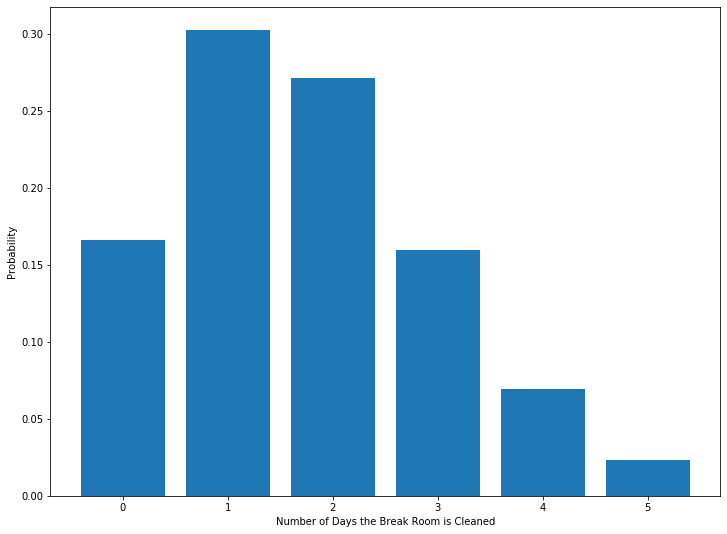

In [45]:
plt.figure(figsize=(12,9))
x = np.arange(0,6)
y = stats.binom(n, p).pmf(x)

plt.bar(x, y)
plt.xlabel("Number of Days the Break Room is Cleaned")
plt.ylabel("Probability")
plt.show()

In [46]:
# How likely is it that it goes two days without getting cleaned
# up?
break_room_cleanliness_th.pmf(3)

0.15943530376915885

In [47]:
# All week?
break_room_cleanliness_th.pmf(0)

0.16578007115626484